In [47]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np


## Finding the central force given a particular orbit

The equation describing the curve is $r(\theta) = R + a \cos (k\theta + \phi)$, with $R>0$ radius of the perturbed circumference, $a$ the amplitude of the perturbation ($|a|<R$ to avoid reaching the origin) and $k$ number of oscillations done in an orbit. If $k \in \mathbb{Z}$, the orbits are periodic. $\phi$ is the initial phase. 

Using the Binet's equation, $u=\frac{1}{r}=\frac{1}{R+a\cos(k\theta+\phi)}$ and deriving twice gives $$\frac{d^2u}{d\theta^2}= \frac{k^2 a\cos (k\theta + \phi)}{(R+a\cos(k\theta+\phi))^2}+ \frac{2k^2a^2\sin^2(k\theta+\phi)}{(R+a\cos(k\theta+\phi))^3}$$ Now to have a central force this has to be rewritten as a function of $r$ by using $a\cos(k\theta +\phi) = r-R$. Substituting this gives the result $$\frac{d^2u}{d\theta^2} = \frac{k^2(r-R)}{r^2}+ \frac{2k^2(a^2-k^2(r-R)^2)}{r^3}$$

 Now Binet's method states that for a central force the equation of motion $\ddot r - \frac{h^2}{r^3}+f(r)=0$ gives $\frac{d^2u}{d\theta^2}+u=\frac{1}{h^2u^2}f(\frac{1}{u})$. By using the previous solution and grouping the terms together, the result is $$f(r)= \frac{h^2-h^2k^2}{r^3}+3\frac{h^2k^2R}{r^4}+2\frac{k^2h^2(a^2-R^2)}{r^5}$$

Any force of the type $f(r)=\frac{A}{r^3}+\frac{B}{r^4}+\frac{C}{r^5}$ can give rise to this kind of orbits if, after choosing $h$, a tuple of values $R$, $k$, $a$ can be found to solve the system and specific intial condotions are chosen. 

In the following cell is reported a solution of the ODE after fixing R,a,k

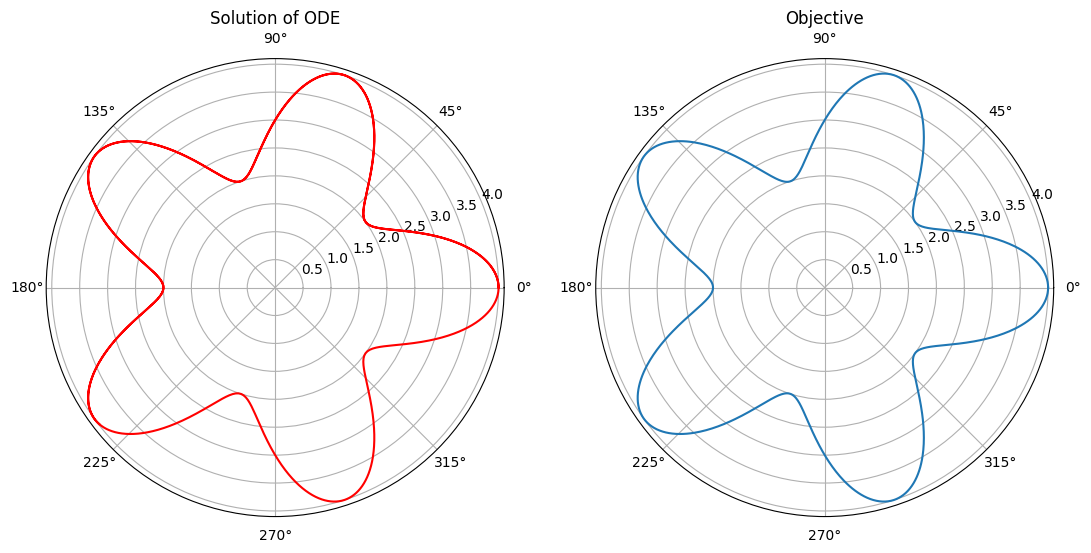

In [48]:
def f(r, h, k, a, R):
  ''' Defining the central force '''
  # I'm not considering the term h^2/r^3 that cancels out in the equation of motion
  return -h**2*k**2/r**3 + 3*h**2*k**2*R/r**4 + 2*h**2*k**2*(a**2-R**2)/r**5



R, a, k = 3, 1, 5
r, dr, theta, dtheta = R+a, 0.0, 0.0, 0.5

h = r**2*dtheta

y0 = np.array([r,dr,theta])

def ode(t, y, h, k, a, R, f):
  ''' Defining the ODE associated to the system'''
  r, dr, theta = y[0], y[1], y[2]
  return np.array([dr, -f(r,h,k,a,R), h*r**-2])



Y = solve_ivp(ode, t_span=(0,12), y0=y0, t_eval=np.linspace(0,12,1000), args=(h,k,a,R, f), rtol=1e-12)

r, dr, theta = Y.y[0], Y.y[1], Y.y[2]

fig, AX = plt.subplots(1,2, figsize = (13,6), subplot_kw={'projection': 'polar'})
AX[0].set_title('Solution of ODE')
AX[0].plot(theta, r, 'r')

AX[1].set_title('Objective')
theta = np.linspace(0,2*np.pi, 1000)
AX[1].plot(theta, R+a*np.cos(k*theta))

plt.show()


## Investigating the orbit of a projectile

The projectile is launched east with a velocity of $5$ $km$ $s^{-1}$ at an angle of $45^\circ$ in the rotating Earth RF, so the velocity in an inertial RF is $\mathbf{v_I}= \mathbf{v} + \mathbf{\omega}\times \mathbf{R}$, so as $\omega=\frac{2\pi}{23 h 56 min 4.1s}= 7.292 \cdot 10^{-5}$ $rad$ $s^{-1}$, and the equatorial radius is $R_E=6378.137$ $km$, the velocity in the inertial RF is $v_I=5.339$ $km$ $s^{-1}$ with an angle of $41.468^\circ$ with the horizon. 

Now the specific angular momentum is $h=R_Ev_I\sin(\alpha+\frac{\pi}{2})=2.5516\cdot10^4$ $km^2$ $s^{-1}$, the gravitational parameter is $\mu= 3.986\cdot$, the energy constant is $C=\frac{1}{2}v^2-\frac{\mu}{R_E}=-48.24$ $km^2$ $s^{-2}$, so the orbit has $e=0.78$, $a=4131$ $km$. The initial true anomaly is found by reversing $r=\frac{a(1-e^2)}{1+e\cos f}$, thus the angular distance covered in the inertial RF is $\phi=2(\pi-f)=33.85^\circ$. 

Finally, the period of the orbit is given by $\frac{T^2}{a^3}=\frac{4\pi^2}{\mu}$ and the time from pericenter as $n(t-\tau)=\cos^{-1}[\frac{1}{e}(1-\frac{r}{a})]-e\sqrt{1-\frac{1}{e^2}(1-\frac{r}{a})^2}$. This gives the time of flight as $T-2t=1137$ $s$ and the angular distance covered in the Earth RF as $\phi-\omega\Delta t=29.09^\circ$

In [49]:
v = 5 #Initail velocity
R = 6378.137  #Equatorial radius
T = 23*3600+56*60+4.100  #Sidereal rotation period
mu = 398600.4415  #Gravitational parameter
alpha = np.deg2rad(45)

omega = 2*np.pi/T
v = np.array([v*np.cos(alpha)+R*omega, v*np.sin(alpha)])  #velocity vector (horizontal and vertical components)
h = R*v[0]
C = 0.5*np.linalg.norm(v)**2-mu/R
e = (1+2*C*h**2/mu**2)**0.5
a = -mu/(2*C)
f = np.arccos(1/e*(a*(1-e**2)/R-1))

phi = 2*(np.pi-f)
print(f'The angular distance covered in the inertial RF is {np.rad2deg(phi)} deg')

T = (4*np.pi**2*a**3/mu)**0.5 #Period of the orbit
n = 2*np.pi/T
t = (np.arccos((1-R/a)/e) - e*(1-(1-R/a)**2/e**2)**0.5)/n
delta_t = T-2*t

print(f'The time of flight is {delta_t} s')
print(f'The angle covered in the Earth RF is {np.rad2deg(phi-omega*delta_t)} deg')


The angular distance covered in the inertial RF is 33.84449835570999 deg
The time of flight is 1137.1251066749837 s
The angle covered in the Earth RF is 29.09350532725621 deg


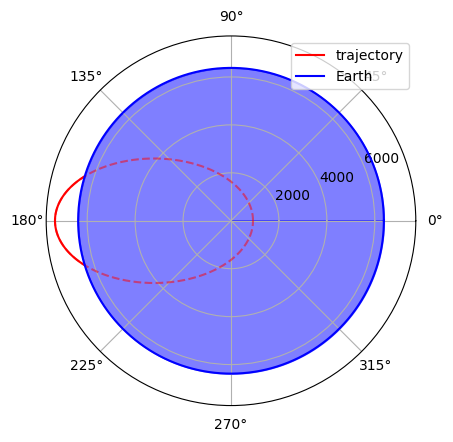

In [58]:
theta = np.linspace(0, 2*np.pi, 1000)

r =lambda theta: a*(1-e**2)/(1+e*np.cos(theta))

ax = plt.subplot(projection='polar')
ax.plot(theta[r(theta)>R], r(theta)[r(theta)>R], color='r', label='trajectory')
ax.plot(theta, r(theta), color='r', linestyle='dashed', alpha=0.5)
ax.plot(theta, R*np.ones(shape=1000), color='blue', label='Earth')
ax.fill_between(theta, R, 0, color='blue', alpha=0.5)
ax.set_yticks(np.arange(2000,8000, 2000))
plt.legend(loc='best')
plt.show()
